In [15]:
library(dplyr)
library(ggplot2)
library(gapminder)

In [16]:
data(gapminder)
gapminder2 = filter(gapminder,country != "Kuwait")
head(gapminder2)
glimpse(gapminder2)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


Rows: 1,692
Columns: 6
$ country   <fct> "Afghanistan", "Afghanistan", "Afghanistan", "Afghanistan", …
$ continent <fct> Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asia, …
$ year      <int> 1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, …
$ lifeExp   <dbl> 28.801, 30.332, 31.997, 34.020, 36.088, 38.438, 39.854, 40.8…
$ pop       <int> 8425333, 9240934, 10267083, 11537966, 13079460, 14880372, 12…
$ gdpPercap <dbl> 779.4453, 820.8530, 853.1007, 836.1971, 739.9811, 786.1134, …


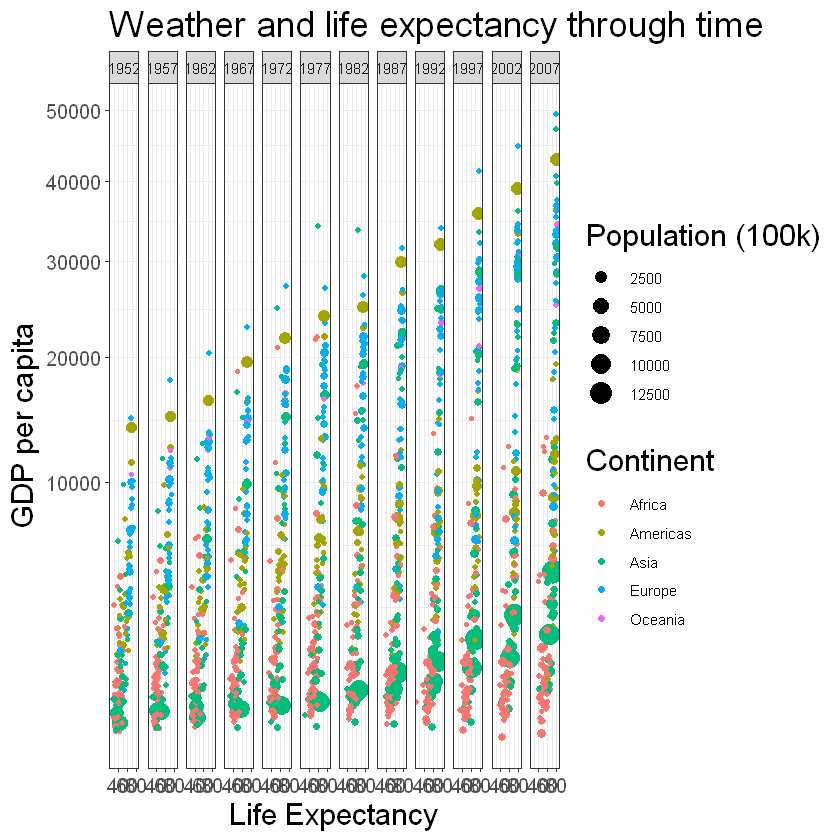

In [17]:
ggplot(gapminder2) + geom_point(aes(x = lifeExp, y = gdpPercap, size=pop/100000, color = continent)) + facet_wrap(~year, nrow = 1) + scale_y_sqrt() + theme_bw() + labs(x = "Life Expectancy", y = "GDP per capita", size = "Population (100k)", color = "Continent", title = "Weather and life expectancy through time") + theme(axis.text.x = element_text(size = 12),axis.text.y = element_text(size = 12),title = element_text(size = 18))
ggsave(
  filename = "Plot1 .png", # 保存的文件名称。通过后缀来决定生成什么格式的图片
  width = 17,             # 宽
  height = 9,            # 高
  units = "in",          # 单位
  dpi = 300              # 分辨率DPI
)

In [18]:
gapminder3 = gapminder2 %>% 
  group_by(continent, year) %>% 
  summarise(gdpPercapweighted = weighted.mean(x = gdpPercap, w = pop), 
                   pop = sum(as.numeric(pop)))                   

`summarise()` has grouped output by 'continent'. You can override using the
`.groups` argument.


In [19]:
# gapminder3 = summarise(group_by(gapminder2,continent, year),gdpPercapweighted = weighted.mean(x = gdpPercap, w = pop), 
#                    pop = sum(as.numeric(pop)))

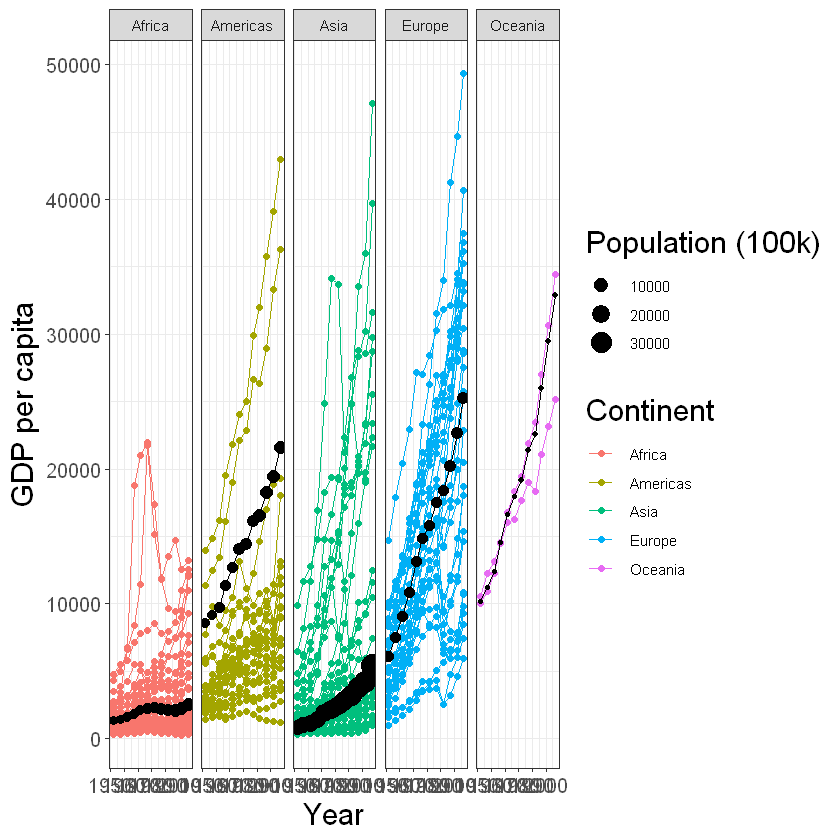

In [20]:
ggplot(gapminder2) + geom_line(aes(x = year, y = gdpPercap, color = continent, group = country)) + geom_point(aes(x = year, y = gdpPercap, color = continent, group = country)) + geom_point(data = gapminder3, aes(x = year, y = gdpPercapweighted, size = pop/100000)) + geom_line(data = gapminder3, aes(x = year, y = gdpPercapweighted)) + facet_wrap(~continent, nrow = 1) + theme_bw() + labs(x = "Year", y = "GDP per capita", size = "Population (100k)", color = "Continent") + theme(axis.text.x = element_text(size = 12),axis.text.y = element_text(size = 12),title = element_text(size = 18))
ggsave(
  filename = "Plot2 .png", # 保存的文件名称。通过后缀来决定生成什么格式的图片
  width = 24,             # 宽
  height = 7,            # 高
  units = "in",          # 单位
  dpi = 300              # 分辨率DPI
)

In [23]:
gapminder3

continent,year,gdpPercapweighted,pop
<fct>,<int>,<dbl>,<dbl>
Africa,1952,1311.2214,237640501
Africa,1957,1444.9520,264837738
Africa,1962,1540.5991,296516865
Africa,1967,1774.8474,335289489
Africa,1972,2063.1713,379879541
Africa,1977,2244.7985,433061021
Africa,1982,2295.1919,499348587
Africa,1987,2180.7643,574834110
Africa,1992,2071.6145,659081517
